In [1]:
import pandas as pd
import random
import numpy as np
import gym
import itertools
import matplotlib
import matplotlib.style
import numpy as np
import pandas as pd
import sys
import gym_gridworlds
#env = gym.make('Gridworld-v0')
  
from collections import defaultdict
import plottingepi
import matplotlib.pyplot as plt
#import plotting

In [45]:
word_df = pd.read_json(r'..\data\processed\wordle_words.json')
word_list = word_df[0].to_list()
word_list = [word.upper() for word in word_list]

In [24]:
# word_df=pd.read_csv('5-letter.csv', index_col=0)
# print(word_df.head())
# word_list = word_df.word.iloc[0:5000,].to_list() # keep top 5000 words
# word_list = word_df.word.to_list() # keep top 5000 words

# word_list.append('WHOMP')
# print(len(word_list))
# np.where(word_df.word=="SHEAR")

In [25]:
class Wordle:
    def __init__(self, word=None, n_guesses=6, n_letters=5, all_words=word_list):
        if word == None:
            self.word = random.sample(set(all_words), 1)[0]
        else:
            self.word = word.upper()
        self.n_guesses = n_guesses
        self.n_letters = n_letters
        self.guess_counter = n_guesses
        self.greens = [None] * self.n_letters 
        self.current_yellows = [None] * self.n_letters
        self.yellows = {i: [] for i in range(self.n_letters)}
        self.guessed_words = []
        self.all_words = all_words
        self.absent_letters = []
        self.present_letters = []
        self.correct_positions = [None] * self.n_letters # greens would be differnt per guess, remember correct positions
        self.state = None
        self.qstate = [0] * self.n_letters
        self.tmp_qstate = [0] * self.n_letters
        self.win = ''
        self.yellowlist = []
        
    def try_word (self, guess):
        # need to add a check for not doing anything if the word is already guessed correctly
        guess = guess.upper()
        self.state = None
        self.current_yellows = [None]* self.n_letters # yellows have to reset each time
        self.greens = [None] * self.n_letters
        self.tmp_qstate = [0] * self.n_letters
        
        print('guessed: ', guess)
        if not len(guess) == self.n_letters:
            raise ValueError('wrong word length')
        if guess not in self.all_words:
            raise ValueError('invalid word')
        if guess in self.guessed_words:
            raise ValueError('word already guessed')
        self.guessed_words.append(guess)
        # c_g = character_guess,  c_w = character_word
        for i, (c_g, c_w) in enumerate(zip(guess, self.word)):
            if c_g == c_w:
                self.greens[i] = c_g
                self.correct_positions[i] = c_g
                self.qstate[i] = 1
                self.tmp_qstate[i] = 1
            # Check for number of non-None in greens list 
            if sum(bool(char) for char in self.greens) == self.n_letters:
                self.state = True
                self.win ='win'
                print('victory! word is: ' + self.word) 
                grn_sum = sum([x!=None for x in self.greens])
                yel_sum = sum([x!=None for x in self.current_yellows])
                return grn_sum, yel_sum
            if c_g in self.word and c_g != c_w:
                self.yellows[i].append(c_g)
                self.current_yellows[i] = c_g
                if c_g not in self.yellowlist:
                    self.yellowlist += c_g
            if c_g in self.word: # track the letters that are there for the AI later
                self.present_letters.append(c_g)
            if c_g not in self.word: # track letters that are not there for the AI
                self.absent_letters.append(c_g)
        self.guess_counter -= 1
        grn_sum = sum([x!=None for x in self.greens])
        yel_sum = sum([x!=None for x in self.current_yellows])
        
        if self.guess_counter == 0:
            self.state=True
            self.win = 'lose'
            print("YOU LOSE-TOO MANY GUESSES")
            return grn_sum, yel_sum # return number of greens and number of yellows
        print('Greens:' + str(self.greens) + 
              '\nYellows: ' + str(self.yellows) + 
              '\nGuesses left: ' + str(self.guess_counter))

        return grn_sum, yel_sum # return number of greens and number of yellows
        

In [26]:
print(len(word_list))

12972


In [27]:
w = Wordle(all_words = word_list)

In [28]:
w.word

'RIFTE'

In [29]:
w.try_word("CLEAN")

guessed:  CLEAN
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['E'], 3: [], 4: []}
Guesses left: 5


(0, 1)

In [30]:
w.yellows

{0: [], 1: [], 2: ['E'], 3: [], 4: []}

In [32]:
w.yellowlist

['E']

In [33]:
w.greens

[None, None, None, None, None]

In [40]:
GREENS = ['C', None, None, None, 'H']
all_words = word_list
match_list=[]
for i, letter in enumerate(GREENS):
    match_list+=[word for word in all_words if word[i]==letter]
    if letter is not None:
        print(i)
        all_words = list(match_list)
        match_list = []

0
4


In [41]:
print(match_list[0:5])
print(match_list[-5:])
print(len(match_list))

[]
[]
0


In [42]:
import string

In [43]:
ABSENT = ['O']

In [44]:
print(len(all_words))
all_words

23


['CLOTH',
 'CINCH',
 'CATCH',
 'COACH',
 'COUCH',
 'COUGH',
 'CRASH',
 'CONCH',
 'CLASH',
 'CRUSH',
 'CANEH',
 'CHETH',
 'CHICH',
 'CLACH',
 'COOCH',
 'COUTH',
 'CRITH',
 'CRWTH',
 'CUISH',
 'CULCH',
 'CURCH',
 'CUTCH',
 'CWTCH']

In [482]:
YELLOWS = {i: [] for i in range(5)}
YELLOWS[1].append('A')
YELLOWS[1].append('Z')

YELLOWS

{0: [], 1: ['A', 'Z'], 2: [], 3: [], 4: []}

In [483]:
aw[0][4]

'H'

In [484]:
aw = list(all_words)
print(len(aw))
for key in YELLOWS.keys():
    #print(key)
    #print([w[key] for w in aw])
    for w in aw:
        #print(w)
        #print(YELLOWS[key])
        if w[key] in YELLOWS[key]:
            aw.remove(w)
print(len(aw))
            

14
12


In [445]:
set(ABSENT).issuperset

<function set.issuperset>

In [38]:
[*filter(set(ABSENT).issuperset, all_words)] 

[]

In [46]:
# player agent class
# try unknown letters

# need to add the ability to take the correct letters as input to the guess methods


## this is where we can have different 'types' of word guesses to be optimized
class Player:
    def __init__(self, all_words):
        self.guesses=0
        self.guessed_words = []
        self.all_words = all_words
        self.tmp_wordlist = []
        
    def get_random_guess(self):
        '''
        make a guess randomly from the word list
        '''       
        current_guess = random.sample(set(self.all_words), 1)[0]
        while(current_guess in self.guessed_words):
            current_guess = random.sample(set(self.all_words), 1)[0]
        self.guessed_words.append(current_guess)
        return current_guess
    #def get_common_guess(self):
    #    i=0
    #    while( self.all_words[i] in self.guessed_words):
    #        i+=1
    #    self.guessed_words.append(self.all_words[i])
    #    return self.all_words[i]
    
    def guess_by_green(self, GREENS):
        match_list=[]
        ALL_WORDS = self.all_words
        if not all(v is None for v in GREENS):
            for i, letter in enumerate(GREENS):
                match_list+=[word for word in ALL_WORDS if word[i]==letter]
                if letter is not None:
                    print(i)
                    ALL_WORDS = list(match_list)
                    match_list = []
            current_guess = random.sample(set(ALL_WORDS), 1)[0]
            # saw this fail on COUCH when it guessed COUGH
            while(current_guess in self.guessed_words):
                current_guess = random.sample(set(ALL_WORDS), 1)[0]
            self.guessed_words.append(current_guess)
            self.tmp_wordlist = ALL_WORDS
        else:
            current_guess = random.sample(set(self.all_words), 1)[0]
            while(current_guess in self.guessed_words):
                current_guess = random.sample(set(self.all_words), 1)[0]
            self.guessed_words.append(current_guess)
            self.tmp_wordlist = self.all_words
        return current_guess
    def guess_by_probs(self): ## guess based on Ben's list
        ALL_WORDS = ['SAINT', 'CORED', 'BULKY', 'WHOMP', "PIVOT",'SUPER']
        i=0
        while( ALL_WORDS[i] in self.guessed_words):
            i+=1
        self.guessed_words.append(ALL_WORDS[i])
        return ALL_WORDS[i]
    
    def guess_by_grn_absent(self, GREENS, ABSENT, YELLOWS):
        match_list=[]
        ALL_WORDS = self.all_words
        if not all(v is None for v in GREENS): # check if the word has greens
            for i, letter in enumerate(GREENS):
                match_list+=[word for word in ALL_WORDS if word[i]==letter]
                if letter is not None:
                    print(i)
                    ALL_WORDS = list(match_list)
                    match_list = []
            ## remove any words with absent characters
            tmpstring = string.ascii_uppercase
            for letter in ABSENT:
                tmpstring=tmpstring.replace(letter, '')
            out = [word for word in ALL_WORDS if all([letter in tmpstring for letter in word])]        
            
            
            ## remove words that have yellow in that position
            #print('length of words b4 yellow:', len(out))
            aw = list(out)
            #print(len(aw))
            for key in YELLOWS.keys():
                #print(key)
                #print([w[key] for w in aw])
                for w in aw:
                    #print(w)
                    #print(YELLOWS[key])
                    if w[key] in YELLOWS[key]:
                        aw.remove(w)
            
            # add part that requires those yellows to be somewhere else in the word
            
            # saw this fail on COUCH when it guessed COUGH
            current_guess = random.sample(set(aw), 1)[0]
            while(current_guess in self.guessed_words):
                current_guess = random.sample(set(aw), 1)[0]
            self.guessed_words.append(current_guess)
            self.tmp_wordlist = aw
            
            
        else:
            current_guess = random.sample(set(self.all_words), 1)[0]
            while(current_guess in self.guessed_words):
                current_guess = random.sample(set(self.all_words), 1)[0]
            self.guessed_words.append(current_guess)
            self.tmp_wordlist = self.all_words
        return current_guess

In [47]:
p = Player(word_list)

In [48]:
p.guess_by_green(['C', 'O', 'U', None, 'H'])

0
1
2
4


'COUTH'

In [51]:
e = Environment()

TypeError: __init__() missing 1 required positional argument: 'WORD_LIST'

In [50]:
## need an environment class that lets the player interact with wordl
class Environment:
    REWARD_YELLOW = 0
    REWARD_GREEN = 5
    REWARD_WIN = 25
    REWARD_LOSE = -15
    
    def __init__(self, WORD_LIST):
        self.reset(WORD_LIST)
    
    def reset(self, WORD_LIST):
        self.game_over = False
        self.score = 0
        self.player = Player(all_words = WORD_LIST)
        self.wordle = Wordle(all_words=WORD_LIST)
        print('+++++++++++++++++++++++++++++++')
        print('the wordl is:', self.wordle.word)
        print('_______________________________')
        self.guesses = 0
        self.action_space = [0,1,2]
        self.greens = [None, None, None, None, None]
        self.tmp_wordlist = []
        return 0
        
    def step(self, action):
        self.guesses += 1
        
        if action==0:
            current_guess = self.player.get_random_guess()
        elif action == 1:
            current_guess = self.player.guess_by_probs()
        elif action == 2:
            current_guess = self.player.guess_by_grn_absent(self.wordle.greens, self.wordle.absent_letters,
                                                           self.wordle.yellows)
            
        n_greens, n_yellows = self.wordle.try_word(current_guess)
        reward = 0
        
        if n_greens>0:
            reward += self.REWARD_GREEN * n_greens
            self.score +=self.REWARD_GREEN
        if n_yellows>0:
            reward += self.REWARD_YELLOW * n_yellows
            self.score +=self.REWARD_YELLOW * n_yellows
            
        if self.wordle.win == 'win':
            reward += self.REWARD_WIN
            self.score +=self.REWARD_WIN
            print('********* win reward: ', reward)
            result = self.wordle.tmp_qstate
            return result, reward, self.wordle.state
        
        if self.wordle.win == 'lose':
            reward = self.REWARD_LOSE
            #self.score +=self.REWARD_WIN
            print('********* lose reward: ', reward)
            result = self.wordle.tmp_qstate
            return result, reward, self.wordle.state
        
        result = self.wordle.tmp_qstate
        self.tmp_wordlist = self.player.tmp_wordlist
        return result, reward, self.wordle.state
        
        

In [52]:
e = Environment(WORD_LIST=word_list)

+++++++++++++++++++++++++++++++
the wordl is: SAVES
_______________________________


In [58]:
e.step(0)

guessed:  SOILS
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15


([1, 0, 0, 0, 1], -15, True)

In [429]:
#from stable_baselines.common.policies import MlpPolicy
#from stable_baselines.common.vec_env import DummyVecEnv
#from stable_baselines import PPO1

In [61]:
def createEpsilonGreedyPolicy(Q, epsilon, num_actions):
    """
    Creates an epsilon-greedy policy based
    on a given Q-function and epsilon.
    
    Returns a function that takes the state
    as an input and returns the probabilities
    for each action in the form of a numpy array
    of length of the action space(set of possible actions).
    """
    def policyFunction(state):

        Action_probabilities = np.ones(num_actions, dtype = float) * epsilon / num_actions
        best_action = np.argmax(Q[state])
        Action_probabilities[best_action] += (1.0 - epsilon)
        return Action_probabilities

    return policyFunction


In [62]:
e.action_space

[0, 1, 2]

In [63]:
env.action_space

NameError: name 'env' is not defined

In [64]:
def qLearning(env, num_episodes, discount_factor = 1.0, alpha = 0.5, epsilon = 0.3):
    """
    Q-Learning algorithm: Off-policy TD control.
    Finds the optimal greedy policy while improving
    following an epsilon-greedy policy"""
    
    # Action value function
    # A nested dictionary that maps
    # state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(len(env.action_space)))
    print(Q)
    # Keeps track of useful statistics
    stats = plottingepi.EpisodeStats(
        episode_lengths = np.zeros(num_episodes),
        episode_rewards = np.zeros(num_episodes))
    win_records = np.zeros(num_episodes)
    
    # Create an epsilon greedy policy function
    # appropriately for environment action space
    policy = createEpsilonGreedyPolicy(Q, epsilon, len(env.action_space) )
    wordlistdict = defaultdict()
    
    # For every episode
    for ith_episode in range(num_episodes):

        # Reset the environment and pick the first action
        state = env.reset(word_list)
        
        for t in itertools.count():
            #print("this is q", Q)
            # get probabilities of all actions from current state
            action_probabilities = policy(state)
            print('action probabilities:', action_probabilities)
            # choose action according to
            # the probability distribution
            action = np.random.choice(np.arange(
                    len(action_probabilities)),
                    p = action_probabilities)
            print('this is the action', action)
            # take action and get reward, transit to next state
            next_state, reward, done = env.step(action)
            print(next_state)
            print('value of next state', str(sum(next_state)) )
            
            next_state = sum(next_state)
            
            # Update statistics
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t
            if(env.wordle.win =='win'):
                win_records[ith_episode] = 1
            elif(env.wordle.win == 'lose'):
                win_records[ith_episode] = 0
            # TD Update
            best_next_action = np.argmax(Q[next_state])	
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
            print('state variable is:',state)

            # done is True if episode terminated
            if done:
                break

            state = next_state
        #wordlistdict[env.wordle.word] = env.tmp_wordlist
            
    return Q, stats, win_records


In [67]:
q1, s1, w1 = qLearning(Environment(WORD_LIST=word_list), 
                       num_episodes=1000,
                       epsilon=0.05,
                       alpha=0.2,
                       discount_factor=0.2)

+++++++++++++++++++++++++++++++
the wordl is: SLOPE
_______________________________
defaultdict(<function qLearning.<locals>.<lambda> at 0x000002708CD25318>, {})
+++++++++++++++++++++++++++++++
the wordl is: MAHOE
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  FUNDI
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  ONSET
Greens:[None, None, None, None, None]
Yellows: {0: ['O'], 1: [], 2: [], 3: ['E'], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  BAWLS
Greens:[None, 'A', None, None, None]
Yellows: {0: ['O'], 1: [], 2: [], 3: ['E'], 4: []}
Guesses left: 3
[0, 1, 0, 0, 0]
value of next state 1
state va

3
guessed:  MOBES
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is: KHOUM
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  COUCH
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['O'], 2: ['U'], 3: [], 4: ['H']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  GLOBS
Greens:[None, None, 'O', None, None]
Yellows: {0: [], 1: ['O'], 2: ['U'], 3: [], 4: ['H']}
Guesses left: 4
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['O'], 2: ['U'], 3: [], 4: ['H']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 1
act

value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  COCOS
Greens:[None, None, None, 'O', 'S']
Yellows: {0: ['N', 'S'], 1: ['O'], 2: ['R'], 3: ['E', 'E'], 4: []}
Guesses left: 2
[0, 0, 0, 1, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
4
guessed:  DINOS
Greens:[None, None, 'N', 'O', 'S']
Yellows: {0: ['N', 'S'], 1: ['O'], 2: ['R'], 3: ['E', 'E'], 4: []}
Guesses left: 1
[0, 0, 1, 1, 1]
value of next state 3
state variable is: 2
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  MIRVS
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: FUDGY
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  RECIT
Greens:[None, None, Non

this is the action 2
1
3
guessed:  GALAX
Greens:[None, 'A', None, 'A', None]
Yellows: {0: ['W'], 1: [], 2: ['D'], 3: [], 4: ['D']}
Guesses left: 2
[0, 1, 0, 1, 0]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
guessed:  YARAK
Greens:[None, 'A', None, 'A', None]
Yellows: {0: ['W'], 1: [], 2: ['D'], 3: [], 4: ['D']}
Guesses left: 1
[0, 1, 0, 1, 0]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
guessed:  PAPAW
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 1, 0]
value of next state 2
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: LOWNS
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, 'N', None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 1, 0]
value of next state 1
sta

action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 0
guessed:  BUBAL
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['R'], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  SNUCK
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: ['R'], 2: [], 3: [], 4: ['K']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  JAVAS
Greens:[None, None, None, None, 'S']
Yellows: {0: ['S'], 1: ['R'], 2: [], 3: [], 4: ['K']}
Guesses left: 2
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  RIGGS
Greens:[None, None, None, None, 'S']
Yellows: {0: ['S', 'R'], 1: ['R'], 2: [], 3: [], 4: ['K']}
Guesses left: 1
[0, 0, 0, 0, 1]


Greens:[None, None, None, None, None]
Yellows: {0: ['B', 'S'], 1: ['U', 'U'], 2: [], 3: ['S', 'G', 'I', 'I'], 4: ['I']}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  PICAS
Greens:[None, 'I', None, None, 'S']
Yellows: {0: ['B', 'S'], 1: ['U', 'U'], 2: [], 3: ['S', 'G', 'I', 'I'], 4: ['I']}
Guesses left: 1
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  BIBES
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 1, 0, 1]
value of next state 3
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: CLIPE
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SORTS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next 

value of next state 3
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: LOTUS
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  SOKAH
Greens:[None, 'O', None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  DORTY
Greens:[None, 'O', None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: ['T'], 4: []}
Guesses left: 4
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  TOWSE
Greens:[None, 'O', None, None, None]
Yellows: {0: ['S', 'T'], 1: [], 2: [], 3: ['T', 'S'], 4: []}
Guesses left: 3
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  B

state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  WHOMP
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[1, 1, 0, 0, 0]
value of next state 2
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: SUHUR
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:['S', None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  KEVIL
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 1
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['R'], 3: [], 4: []}
Guess

this is the action 2
4
guessed:  ARAME
Greens:[None, 'R', None, None, 'E']
Yellows: {0: [], 1: [], 2: ['R'], 3: ['E'], 4: []}
Guesses left: 4
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  GRYPE
Greens:[None, 'R', None, 'P', 'E']
Yellows: {0: [], 1: [], 2: ['R'], 3: ['E'], 4: []}
Guesses left: 3
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
4
guessed:  DRUPE
victory! word is: DRUPE
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: SPIVS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  GRIEF
Greens:[None, None, 'I', None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 1, 0, 0]
value of next state 1
state variable is

value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
3
guessed:  ADOPT
victory! word is: ADOPT
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: JEFES
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  YEALM
Greens:[None, 'E', None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  BENTO
Greens:[None, 'E', None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  SERED
Greens:[None, 'E', None, 'E', None]
Yellows: {0: ['S'], 1: [], 2: 

guessed:  BEZEL
Greens:['B', None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 3
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  BARDO
Greens:['B', None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: ['O']}
Guesses left: 2
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  BOBAC
Greens:['B', 'O', None, 'A', None]
Yellows: {0: [], 1: ['A'], 2: ['B'], 3: [], 4: ['O']}
Guesses left: 1
[1, 1, 0, 1, 0]
value of next state 3
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
3
guessed:  BOOAY
victory! word is: BOOAY
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: PAVID
_______________________________
action probabil

guessed:  VEGOS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['E', 'E'], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  RODES
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['E', 'E'], 2: [], 3: ['E'], 4: []}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  POSSE
Greens:['P', None, None, None, 'E']
Yellows: {0: [], 1: ['E', 'E'], 2: [], 3: ['E'], 4: []}
Guesses left: 1
[1, 0, 0, 0, 1]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
4
guessed:  PLEBE
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[1, 0, 0, 0, 1]
value of next state 2
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: SOPPY
_______________________________

state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  HIPLY
Greens:['H', 'I', None, None, None]
Yellows: {0: [], 1: [], 2: ['I'], 3: ['I', 'L'], 4: []}
Guesses left: 1
[1, 1, 0, 0, 0]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
guessed:  HILCH
victory! word is: HILCH
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: RELAX
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  FIRTH
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['R'], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  GOSSE
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['R'], 3: [

3
guessed:  KNELL
victory! word is: KNELL
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: KOKAS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SPAMS
Greens:[None, None, None, None, 'S']
Yellows: {0: ['S'], 1: [], 2: ['A'], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  FOLKS
Greens:[None, 'O', None, None, 'S']
Yellows: {0: ['S'], 1: [], 2: ['A'], 3: ['K'], 4: []}
Guesses left: 4
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  TOSES
Greens:[None, 'O', None, None, 'S']
Yellows: {0: ['S'], 1: [], 2: ['A', 'S'], 3: ['K'], 4: []}
Guesses left: 3
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 2
act

state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
4
guessed:  USERS
Greens:[None, None, 'E', None, 'S']
Yellows: {0: [], 1: ['L', 'E', 'S'], 2: ['L'], 3: ['W'], 4: []}
Guesses left: 2
[0, 0, 1, 0, 1]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
4
guessed:  SWEES
Greens:[None, None, 'E', None, 'S']
Yellows: {0: ['S'], 1: ['L', 'E', 'S', 'W'], 2: ['L'], 3: ['W', 'E'], 4: []}
Guesses left: 1
[0, 0, 1, 0, 1]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
4
guessed:  KIEVS
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 1, 0, 1]
value of next state 3
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: SOCKS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  AXMAN
Greens:[None, None, None, None,

state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  MAQUI
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['R'], 2: [], 3: ['U'], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  GUILE
Greens:[None, 'U', None, None, None]
Yellows: {0: [], 1: ['R'], 2: [], 3: ['U'], 4: ['E']}
Guesses left: 3
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  RUNNY
Greens:[None, 'U', None, None, None]
Yellows: {0: ['R'], 1: ['R'], 2: [], 3: ['U'], 4: ['E']}
Guesses left: 2
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  JUKED
Greens:[None, 'U', None, 'E', None]
Yellows: {0: ['R'], 1: ['R'], 2: [], 3: ['U'], 4: ['E']}
Guesses

state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  FADDY
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is: BAALS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  POULT
Greens:[None, None, None, 'L', None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 1
guessed:  SAINT
Greens:[None, 'A', None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  DASHY
Greens:[None, 'A', None, None, None]
Yellows: {0: ['S'], 1: [], 2: ['S'], 3: [], 4: [

value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  WOMEN
Greens:[None, 'O', None, 'E', None]
Yellows: {0: [], 1: [], 2: ['O'], 3: [], 4: []}
Guesses left: 2
[0, 1, 0, 1, 0]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
guessed:  COZED
Greens:[None, 'O', None, 'E', 'D']
Yellows: {0: [], 1: [], 2: ['O'], 3: [], 4: []}
Guesses left: 1
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
4
guessed:  LOVED
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: SANGH
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  YAWPS
Greens:[None, 'A', None, None, None]
Yellows: {0: [], 1

action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
2
3
4
guessed:  SCARE
Greens:['S', None, 'A', 'R', 'E']
Yellows: {0: [], 1: [], 2: [], 3: ['E'], 4: ['S']}
Guesses left: 2
[1, 0, 1, 1, 1]
value of next state 4
state variable is: 4
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
2
3
4
guessed:  SWARE
Greens:['S', None, 'A', 'R', 'E']
Yellows: {0: [], 1: [], 2: [], 3: ['E'], 4: ['S']}
Guesses left: 1
[1, 0, 1, 1, 1]
value of next state 4
state variable is: 4
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
2
3
4
guessed:  SEARE
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[1, 0, 1, 1, 1]
value of next state 4
state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: KLICK
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  KOBAN
Greens:['K', None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
G

[0, 0, 0, 1, 1]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
4
guessed:  EDGES
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 1, 1]
value of next state 2
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: SETUP
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  UNKET
Greens:[None, None, None, None, None]
Yellows: {0: ['U'], 1: [], 2: [], 3: ['E'], 4: ['T']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SNEAD
Greens:['S', None, None, None, None]
Yellows: {0: ['U'], 1: [], 2: ['E'], 3: ['E'], 4: ['T']}
Guesses left: 4
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  SHMOE
Greens:['S', None, None, N

state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  JUMPS
Greens:[None, 'U', None, None, 'S']
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  BUBAS
Greens:[None, 'U', None, None, 'S']
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 2
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  LULUS
Greens:[None, 'U', None, None, 'S']
Yellows: {0: ['S'], 1: [], 2: [], 3: ['U'], 4: []}
Guesses left: 1
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  HUERS
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 0, 1]
value of next state 2
state variable 

guessed:  ALOIN
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['I', 'I', 'I'], 4: []}
Guesses left: 1
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  PRILL
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 1, 0, 0]
value of next state 2
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: BRIGS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  ADEEM
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  NAANS
Greens:[None, None, None, None, 'S']
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
action probabilitie

********* lose reward:  -15
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: USQUE
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  CHEMS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['E'], 3: [], 4: ['S']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SANES
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: [], 2: ['E'], 3: ['E'], 4: ['S', 'S']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  GARBO
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: [], 2: ['E'], 3: ['E'], 4: ['S', 'S']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667

state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  WHOMP
Greens:[None, 'H', None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: ['K'], 4: ['Y']}
Guesses left: 2
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  KHAYA
victory! word is: KHAYA
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is: PEINS
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, 'I', 'N', None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 1, 1, 0]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
3
guessed:  EKING
Greens:[None, None, 'I', 'N', None]
Yellows: {0: ['S', 'E'], 1: [], 2: [], 3: [

value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  GAMME
Greens:['G', 'A', None, None, 'E']
Yellows: {0: [], 1: [], 2: [], 3: ['G'], 4: ['A']}
Guesses left: 1
[1, 1, 0, 0, 1]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
4
guessed:  GAFFE
victory! word is: GAFFE
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: NAGGY
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, 'A', None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['N'], 4: []}
Guesses left: 5
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  JAGRA
Greens:[None, 'A', 'G', None, None]
Yellows: {0: [], 1:

+++++++++++++++++++++++++++++++
the wordl is: PZAZZ
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  BULKY
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  WHOMP
Greens:[None, None, None, None, None]
Yellows: {0: [], 1:

action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['I'], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, 'E', None]
Yellows: {0: [], 1: [], 2: ['I', 'R'], 3: [], 4: ['D']}
Guesses left: 4
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  JULEP
Greens:[None, None, None, 'E', None]
Yellows: {0: [], 1: [], 2: ['I', 'R'], 3: [], 4: ['D']}
Guesses left: 3
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  BEDEW
Greens:['B', None, 'D', 'E', None]
Yellows: {0: [], 1: ['E'], 2: ['I', 'R'], 3: [], 4: ['D']}
Guesses left: 2
[1, 0, 1, 1, 

state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  ALDER
Greens:['A', None, None, None, None]
Yellows: {0: ['N'], 1: ['A'], 2: [], 3: ['I'], 4: []}
Guesses left: 4
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  ANCHO
Greens:['A', None, None, None, None]
Yellows: {0: ['N'], 1: ['A', 'N'], 2: [], 3: ['I'], 4: ['O']}
Guesses left: 3
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  APPUI
Greens:['A', None, None, None, None]
Yellows: {0: ['N'], 1: ['A', 'N'], 2: [], 3: ['I'], 4: ['O', 'I']}
Guesses left: 2
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  AINGA
Greens:['A', None, None, None, None]
Yellows: {0: ['N'], 1: ['A', 'N', 'I'], 2

this is the action 2
0
1
guessed:  SOLDE
Greens:['S', 'O', 'L', 'D', None]
Yellows: {0: [], 1: [], 2: ['O'], 3: [], 4: []}
Guesses left: 4
[1, 1, 1, 1, 0]
value of next state 4
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
2
3
guessed:  SOLDS
victory! word is: SOLDS
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: KYDST
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  GLITS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['T'], 4: ['S']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  COSET
Greens:[None, None, None, None, 'T']
Yellows: {0: [], 1: [], 2: ['S'], 3: ['T'], 4: ['S']}
Guesses left: 4
[0, 0, 0, 0, 1]
value of next state 1
state vari

guessed:  AMOUR
Greens:[None, None, None, None, None]
Yellows: {0: ['E'], 1: ['E'], 2: ['G'], 3: ['U'], 4: []}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  VROOM
Greens:[None, None, None, None, None]
Yellows: {0: ['E'], 1: ['E'], 2: ['G'], 3: ['U'], 4: []}
Guesses left: 1
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  DONEE
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: AGLEE
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  LOVIE
Greens:[None, None, None, None, 'E']
Yellows: {0: ['L'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
actio

2
guessed:  PYOTS
victory! word is: PYOTS
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is: APSOS
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: ['A', 'O'], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  BULKY
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: ['A', 'O'], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
actio

state variable is: 3
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
4
guessed:  ZIZEL
victory! word is: ZIZEL
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: MAMEY
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, 'A', None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  HAREM
Greens:[None, 'A', None, 'E', None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['M']}
Guesses left: 4
[0, 1, 0, 1, 0]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
guessed:  CAGED
Greens:[None, 'A', None, 'E', None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['M']

this is the action 0
guessed:  BIKIE
Greens:['B', None, None, 'I', None]
Yellows: {0: [], 1: ['I', 'I'], 2: [], 3: ['E'], 4: ['E']}
Guesses left: 4
[1, 0, 0, 1, 0]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
3
guessed:  BOLIX
Greens:['B', None, None, 'I', None]
Yellows: {0: [], 1: ['I', 'I'], 2: [], 3: ['E'], 4: ['E']}
Guesses left: 3
[1, 0, 0, 1, 0]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
3
guessed:  BANIA
Greens:['B', None, None, 'I', None]
Yellows: {0: [], 1: ['I', 'I'], 2: [], 3: ['E'], 4: ['E']}
Guesses left: 2
[1, 0, 0, 1, 0]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
3
guessed:  BEFIT
victory! word is: BEFIT
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: BOPP

state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
4
guessed:  FETES
Greens:[None, None, None, 'E', 'S']
Yellows: {0: [], 1: ['E'], 2: [], 3: [], 4: []}
Guesses left: 2
[0, 0, 0, 1, 1]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
4
guessed:  RAZES
Greens:[None, 'A', None, 'E', 'S']
Yellows: {0: [], 1: ['E'], 2: [], 3: [], 4: []}
Guesses left: 1
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
4
guessed:  JADES
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: NERTS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  FATTY
Greens:[None, None, None, 'T', None]
Yellows: {0: [], 1: [], 2: ['T'], 3: [

4
guessed:  NOOKS
victory! word is: NOOKS
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: WIVES
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  QUERN
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['E'], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  PSALM
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['S'], 2: ['E'], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  GATOR
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['S'], 2: ['E'], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabiliti

1
2
4
guessed:  PAGAN
victory! word is: PAGAN
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: LEGIT
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  ERGOT
Greens:[None, None, 'G', None, 'T']
Yellows: {0: ['E'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 1, 0, 1]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
4
guessed:  UNGET
Greens:[None, None, 'G', None, 'T']
Yellows: {0: ['E'], 1: [], 2: [], 3: ['E'], 4: []}
Guesses left: 4
[0, 0, 1, 0, 1]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
4
guessed:  SIGHT
Greens:[None, None, 'G', None, 'T']
Yellows: {0: ['E'], 1: ['I'], 2: [], 3: ['E'], 4: []}
Guesses left: 3
[0, 0, 1, 0, 1]
value of next state 2
state variable is: 2
action pr

1
guessed:  GAFFS
Greens:[None, 'A', None, None, 'S']
Yellows: {0: ['S'], 1: ['R'], 2: [], 3: [], 4: ['A', 'A']}
Guesses left: 1
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  JAAPS
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: BLEBS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  TYLER
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['L'], 3: ['E'], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  HOSER
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['L', 'S'], 3: ['E', 'E'], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variab

action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SHIRT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['L'], 2: [], 3: ['R', 'R'], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SHEAL
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['L'], 2: ['E'], 3: ['R', 'R', 'A'], 4: ['L']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  LEERY
Greens:['L', None, None, None, None]
Yellows: {0: [], 1: ['L', 'E'], 2: ['E', 'E'], 3: ['R', 'R', 'A', 'R'], 4: ['L']}
Guesses left: 2
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  LUBED
Greens:['L', None, None, 'E', None]
Yellows: {0: [], 1: ['L', 'E'], 2: ['E', 'E

[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: ADMIT
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, 'T']
Yellows: {0: [], 1: ['A'], 2: ['I'], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  FRACT
Greens:[None, None, None, None, 'T']
Yellows: {0: [], 1: ['A'], 2: ['I', 'A'], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  PIPET
Greens:[None, None, None, None, 'T']
Yellows: {0: [], 1: ['A', 'I'], 2: ['I', 'A'], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is th

action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
4
guessed:  REDOS
victory! word is: REDOS
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: BAYED
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, 'A', None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  JACKY
Greens:[None, 'A', None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['Y']}
Guesses left: 4
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  PADRE
Greens:[None, 'A', None, None, None]
Yellows: {0: [], 1: [], 2: ['D'], 3: [], 4: ['Y', 'E']}
Guesses lef

value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
guessed:  COOKY
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[1, 1, 0, 0, 0]
value of next state 2
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: STUPE
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:['S', None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['T']}
Guesses left: 5
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  SORBO
Greens:['S', None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['T']}
Guesses left: 4
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  SCUPS
Greens:['S', None, 'U', 'P', None]
Yellows: {0: [], 1: [

action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  TOTES
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is: PARTS
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  BUTUT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['T'], 3: [], 4: ['T']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  MARRI
Greens:[None, 'A', 'R', None, None]
Yellows: {0: [], 1: [], 2: ['T'], 3: ['R'], 4: ['T']}
Guesses left: 4
[0, 1, 1, 0, 0]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
2
guessed:  LARCH
Greens:[None, 'A', 'R', None, None]
Yellows: {0: [], 1: [], 2: ['T'], 3: ['R'], 4: ['T']}
Gu

action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
2
guessed:  SHIMS
Greens:['S', None, 'I', None, 'S']
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[1, 0, 1, 0, 1]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
2
4
guessed:  SPIES
Greens:['S', None, 'I', 'E', 'S']
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 3
[1, 0, 1, 1, 1]
value of next state 4
state variable is: 3
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
2
3
4
guessed:  SKIES
victory! word is: SKIES
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: GRENS
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, 'N', None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0,

state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is: VOULU
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 2
guessed:  PINES
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, 'O', None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  MOLLY
Greens:[None, 'O', None, 'L', None]
Yellows:

guessed:  CORED
Greens:[None, None, None, 'E', None]
Yellows: {0: [], 1: [], 2: ['I', 'R'], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  EXEEM
Greens:[None, None, None, 'E', None]
Yellows: {0: ['E'], 1: [], 2: ['I', 'R', 'E'], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  GLUEY
Greens:[None, None, None, 'E', None]
Yellows: {0: ['E'], 1: [], 2: ['I', 'R', 'E'], 3: [], 4: []}
Guesses left: 2
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  VIPER
Greens:[None, 'I', 'P', 'E', 'R']
Yellows: {0: ['E'], 1: [], 2: ['I', 'R', 'E'], 3: [], 4: []}
Guesses left: 1
[0, 1, 1, 1, 1]
value of next state 4
state variable is: 1
action probabil

YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: UNTAX
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  ZOBOS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  NAHAL
Greens:[None, None, None, 'A', None]
Yellows: {0: ['N'], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  DRYAD
Greens:[None, None, None, 'A', None]
Yellows: {0: ['N'], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0

[0, 1, 0, 1, 1]
value of next state 3
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: CAUDA
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  ENROL
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  ETTIN
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  BATTY
Greens:[None, 'A', None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  PAWAS
Greens

state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: FOLDS
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, 'O', None, None, None]
Yellows: {0: ['S'], 1: [], 2: [], 3: [], 4: ['D']}
Guesses left: 4
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  SOUPS
Greens:[None, 'O', None, None, 'S']
Yellows: {0: ['S', 'S'], 1: [], 2: [], 3: [], 4: ['D']}
Guesses left: 3
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  LOGOS
Greens:[None, 'O', Non

action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: [], 2: ['I'], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, None, None]
Yellows: {0: ['S'], 1: [], 2: ['I'], 3: ['E'], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 0
guessed:  SITED
Greens:[None, 'I', None, None, None]
Yellows: {0: ['S', 'S'], 1: [], 2: ['I'], 3: ['E', 'E'], 4: []}
Guesses left: 3
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  JIFFS
Greens:[None, 'I', None, None, 'S']
Yellows: {0: ['S', 'S'], 1: [], 2: ['I'], 3: ['E', 'E'], 4: []}
Guesses left: 2

guessed:  UNTIL
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: ALGUM
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  ORLES
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['L'], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  BLUDS
Greens:[None, 'L', None, None, None]
Yellows: {0: [], 1: [], 2: ['L', 'U'], 3: [], 4: []}
Guesses left: 4
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  PLATT
Greens:[None, 'L', None, None, None]
Yellows: {0: [], 1: [], 2: ['L', 'U', 'A'], 3: [], 4: []}
Guesses left: 3
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 1
action 

4
guessed:  IZZAT
Greens:[None, None, None, None, 'T']
Yellows: {0: ['I'], 1: ['A'], 2: ['I'], 3: ['I', 'A'], 4: []}
Guesses left: 3
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  DUCAT
Greens:[None, None, None, None, 'T']
Yellows: {0: ['I'], 1: ['A'], 2: ['I'], 3: ['I', 'A', 'A'], 4: []}
Guesses left: 2
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  PEWIT
Greens:[None, None, None, None, 'T']
Yellows: {0: ['I'], 1: ['A'], 2: ['I'], 3: ['I', 'A', 'A', 'I'], 4: []}
Guesses left: 1
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  FIGHT
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 1, 1, 1]
value of next state 4
state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is

state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  BLUET
Greens:[None, None, None, 'E', 'T']
Yellows: {0: [], 1: ['E', 'L'], 2: [], 3: ['O'], 4: ['E', 'L']}
Guesses left: 1
[0, 0, 0, 1, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
4
guessed:  OCTET
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 1, 1]
value of next state 2
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: AMYLS
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  MOLAL
Greens:[None, None, None, None, None]
Yellows: {0: ['M'], 1: [], 2: ['L'], 3: ['A'], 4: ['L']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  SWATS
Greens:[None, None, None, None, 'S']
Yellows: {0: ['M',

state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
4
guessed:  LOTTE
Greens:[None, None, None, 'T', 'E']
Yellows: {0: ['I', 'L'], 1: ['E'], 2: ['T'], 3: ['E', 'L'], 4: []}
Guesses left: 2
[0, 0, 0, 1, 1]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
4
guessed:  ELITE
victory! word is: ELITE
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: BUSBY
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  MURES
Greens:[None, 'U', None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['S']}
Guesses left: 5
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  PUKKA
Greens:[None, 'U', None, None, None]
Yellows: {0: [], 1: [], 2

guessed:  EXEEM
victory! word is: EXEEM
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: KREEP
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  SERVE
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['E'], 2: ['R'], 3: [], 4: ['E']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  CADRE
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['E'], 2: ['R'], 3: ['R'], 4: ['E', 'E']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  KNOLL
Greens:['K', None, None, None, None]
Yellows: {0: [], 1: ['E'], 2: ['R'], 3: ['R'], 4: ['E', 'E']}
Guesses left: 3
[1, 0, 0, 0, 0]
value of next state 1
state variable

state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: ['T']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  BULKY
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A', 'U'], 2: [], 3: [], 4: ['T']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  WHOMP
Greens:[None, 'H', None, None, None]
Yellows: {0: [], 1: ['A', 'U'], 2: [], 3: [], 4: ['T']}
Guesses left: 2
[0, 1, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
guessed:  THUJA
victory! word is: THUJA
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variab

this is the action 2
1
3
4
guessed:  OOHED
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: ALWAY
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  THESE
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SHOWN
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['W'], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  PYXED
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['Y'], 2: [], 3: ['W'], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable i

this is the action 2
3
guessed:  DUDED
Greens:[None, None, None, 'E', None]
Yellows: {0: ['A'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  HOKES
Greens:[None, None, None, 'E', 'S']
Yellows: {0: ['A'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 1, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
4
guessed:  TATES
Greens:[None, 'A', None, 'E', 'S']
Yellows: {0: ['A'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 2
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
4
guessed:  EALES
Greens:[None, 'A', None, 'E', 'S']
Yellows: {0: ['A', 'E'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 1
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 3
action probabilities: [0.01

guessed:  VIGIA
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SEDES
Greens:[None, None, None, 'E', 'S']
Yellows: {0: ['S'], 1: ['E'], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 1, 1]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
4
guessed:  OOZES
Greens:['O', None, None, 'E', 'S']
Yellows: {0: ['S'], 1: ['E', 'O'], 2: [], 3: [], 4: []}
Guesses left: 3
[1, 0, 0, 1, 1]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
3
4
guessed:  OCHES
Greens:['O', None, None, 'E', 'S']
Yellows: {0: ['S'], 1: ['E', 'O'], 2: [], 3: [], 4: []}
Guesses left: 2
[1, 0, 0, 1, 1]
value of next state 3
state variable is: 3
action probabilities: [0.01666667 0.0166

action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  MICOS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['C'], 3: [], 4: ['S']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SHOLA
Greens:['S', None, None, None, None]
Yellows: {0: [], 1: [], 2: ['C'], 3: [], 4: ['S']}
Guesses left: 4
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  SWERF
Greens:['S', None, None, None, None]
Yellows: {0: [], 1: [], 2: ['C'], 3: [], 4: ['S', 'F']}
Guesses left: 3
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 0
guessed:  ALLOD
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['C'], 3: [], 4: ['S', 'F']}
Guesses left: 2
[0, 0, 0, 0, 0]
v

0
2
guessed:  GRAND
Greens:['G', 'R', 'A', 'N', None]
Yellows: {0: [], 1: ['N'], 2: ['N'], 3: ['R'], 4: []}
Guesses left: 2
[1, 1, 1, 1, 0]
value of next state 4
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
2
3
guessed:  GRANT
Greens:['G', 'R', 'A', 'N', None]
Yellows: {0: [], 1: ['N'], 2: ['N'], 3: ['R'], 4: []}
Guesses left: 1
[1, 1, 1, 1, 0]
value of next state 4
state variable is: 4
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
2
3
guessed:  GRANA
victory! word is: GRANA
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: JIHAD
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  PALEA
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: ['A']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0

guessed:  LAMPS
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: AWING
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  ROTCH
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  ROOFY
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  DADAS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: [], 3: ['A'], 4: []}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.

action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  TASER
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A', 'A'], 2: ['R'], 3: [], 4: ['R']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  AZURE
Greens:['A', None, None, 'R', None]
Yellows: {0: [], 1: ['A', 'A'], 2: ['R'], 3: [], 4: ['R']}
Guesses left: 2
[1, 0, 0, 1, 0]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A', 'A', 'A'], 2: ['R'], 3: [], 4: ['R']}
Guesses left: 1
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 2
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  RUSMA
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 0]
value of next state 0
state variabl

action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
4
guessed:  PATER
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: CHUBS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  MORES
Greens:[None, None, None, None, 'S']
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  BAYTS
Greens:[None, None, None, None, 'S']
Yellows: {0: ['B'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  LINDS
Greens:[None, None, None, None, 'S']
Yellows: {0: ['B'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 3
[

guessed:  DEXIE
Greens:[None, 'E', None, None, 'E']
Yellows: {0: ['Y', 'D', 'D'], 1: [], 2: ['B'], 3: ['D'], 4: []}
Guesses left: 1
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  BEVUE
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[1, 1, 0, 0, 1]
value of next state 3
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: SIENT
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  GORIS
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['I'], 4: ['S']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 2
guessed:  ELOIN
Greens:[None, None, None, None, None]
Yellows: {0: ['E'], 1: [], 2: [], 3: ['I', 'I'], 4: ['S', 'N']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state 

action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
4
guessed:  ESNES
Greens:[None, None, None, 'E', 'S']
Yellows: {0: ['S', 'E'], 1: ['E', 'S'], 2: ['U'], 3: ['U'], 4: []}
Guesses left: 1
[0, 0, 0, 1, 1]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
4
guessed:  JEFES
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 1, 1]
value of next state 2
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: TERAI
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  TOPES
Greens:['T', None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['E'], 4: []}
Guesses left: 5
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['A'], 2: ['I'], 3: ['E

value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  BULKY
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['U'], 2: [], 3: ['E', 'E'], 4: []}
Guesses left: 1
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 1
guessed:  WHOMP
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: UNLED
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  JEELY
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['E'], 2: ['E'], 3: ['L'], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  OKRAS
Greens:[None, None, None, None, None]
Yellows: {

guessed:  BEGUM
Greens:[None, None, None, None, None]
Yellows: {0: ['B'], 1: ['A', 'A', 'A'], 2: ['S'], 3: [], 4: ['S']}
Guesses left: 1
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  NOOPS
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: POGEY
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  PUFFA
Greens:['P', None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[1, 0, 0, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
guessed:  POKER
Greens:['P', 'O', None, 'E', None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[1, 1, 0, 1, 0]
value of next state 3
state variable is: 1
action prob

state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: GURNS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  PATIO
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  INBOX
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['N'], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  TAALS
Greens:[None, None, None, None, 'S']
Yellows: {0: [], 1: ['N'], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  EGERS
Greens:[None, None, None, None, 'S']
Y

state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
4
guessed:  RUBIN
Greens:[None, None, 'B', 'I', 'N']
Yellows: {0: ['A', 'A'], 1: [], 2: [], 3: ['B', 'A'], 4: []}
Guesses left: 2
[0, 0, 1, 1, 1]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
3
4
guessed:  SABIN
victory! word is: SABIN
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: TAINS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  BOETS
Greens:[None, None, None, None, 'S']
Yellows: {0: [], 1: [], 2: [], 3: ['T'], 4: []}
Guesses left: 5
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  MARKS
Greens:[None, 'A', None, None, 'S']
Yellows: {0: [], 1: [], 2: [], 

this is the action 0
guessed:  CLAMS
Greens:[None, None, 'A', None, None]
Yellows: {0: ['O'], 1: ['A'], 2: ['S'], 3: [], 4: ['S', 'S']}
Guesses left: 4
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  HEAVY
Greens:['H', None, 'A', None, None]
Yellows: {0: ['O'], 1: ['A'], 2: ['S'], 3: [], 4: ['S', 'S']}
Guesses left: 3
[1, 0, 1, 0, 0]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
2
guessed:  HOARS
Greens:['H', 'O', 'A', None, None]
Yellows: {0: ['O'], 1: ['A'], 2: ['S'], 3: [], 4: ['S', 'S', 'S']}
Guesses left: 2
[1, 1, 1, 0, 0]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
0
1
2
guessed:  HOAST
victory! word is: HOAST
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the 

YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is: WRICK
_______________________________
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  BUYER
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['R']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  FURAL
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['R'], 3: [], 4: ['R']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
guessed:  OMASA
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: ['R'], 3: [], 4: ['R']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.0166666

value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  TUTEE
Greens:[None, 'U', None, 'E', 'E']
Yellows: {0: ['E'], 1: ['E'], 2: ['U', 'E'], 3: ['U'], 4: []}
Guesses left: 1
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
4
guessed:  SUJEE
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: WHISH
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  PAGOD
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  MIENS
Greens:[None, None, None, None, None]
Yellow

state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: TOPER
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  OFFED
Greens:[None, None, None, 'E', None]
Yellows: {0: ['O'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  JUPES
Greens:[None, None, 'P', 'E', None]
Yellows: {0: ['O'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 1, 1, 0]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
3
guessed:  REPEG
Greens:[None, None, 'P', 'E', None]
Yellows: {0: ['O', 'R'], 1: ['E'], 2: [], 3: [], 4: []}
Guesses left: 3
[0, 0, 1, 1, 0]
value of next state 2
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
3
guessed:  EXPEL
Greens:[None, None, 'P'

state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  VEERS
Greens:[None, None, 'E', 'R', 'S']
Yellows: {0: [], 1: ['E'], 2: ['R'], 3: ['E'], 4: ['R']}
Guesses left: 1
[0, 0, 1, 1, 1]
value of next state 3
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
3
4
guessed:  EYERS
victory! word is: EYERS
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: WEFTS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  TEPAS
Greens:[None, 'E', None, None, 'S']
Yellows: {0: ['T'], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 1, 0, 0, 1]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
4
guessed:  HEFTS
Greens:[None, 'E', 'F', 'T', 'S']
Yellows: {0: ['T'], 1: [], 2: [], 3: [

this is the action 0
guessed:  EIKON
Greens:[None, None, None, None, None]
Yellows: {0: ['E', 'E'], 1: ['D', 'A'], 2: [], 3: ['E'], 4: ['E', 'E', 'E']}
Guesses left: 1
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  JUROR
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: GRAPE
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SPOOL
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['P'], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  CRANK
Greens:[None, 'R', 'A', None, None]
Yellows: {0: [], 1: ['P'], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 1, 1, 0, 0]
value of next sta

[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: CRIMS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  QUEUE
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  ARILS
Greens:[None, 'R', 'I', None, 'S']
Yellows: {0: [], 1: [], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 1, 1, 0, 1]
value of next state 3
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
2
4
guessed:  CRIMS
victory! word is: CRIMS
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: DROOG
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this i

action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  DORMS
Greens:[None, None, None, None, 'S']
Yellows: {0: ['S'], 1: ['A'], 2: ['S'], 3: [], 4: []}
Guesses left: 2
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  HAFFS
Greens:[None, None, None, None, 'S']
Yellows: {0: ['S'], 1: ['A', 'A'], 2: ['S'], 3: [], 4: []}
Guesses left: 1
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  WALLS
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 1
+++++++++++++++++++++++++++++++
the wordl is: ROMAN
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  TONER
Greens:[None, 'O', None, None, None]
Yellows: {0: [], 1: [], 2: ['N'], 3: [], 4: ['R

Greens:[None, 'O', None, 'N', 'E']
Yellows: {0: ['O'], 1: ['E'], 2: ['O', 'N'], 3: [], 4: []}
Guesses left: 1
[0, 1, 0, 1, 1]
value of next state 3
state variable is: 3
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
3
4
guessed:  BOWNE
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 1, 1, 1, 1]
value of next state 4
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: TWINE
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, 'I', 'N', None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['T']}
Guesses left: 5
[0, 0, 1, 1, 0]
value of next state 2
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
3
guessed:  HYING
Greens:[None, None, 'I', 'N', None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['T']}
Guesses left: 4
[0, 0, 1, 1, 0]
value of next state 2
state variable is: 2
action probabilities: [0

value of next state 0
state variable is: 0
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  CORED
Greens:[None, None, None, 'E', None]
Yellows: {0: [], 1: [], 2: ['R'], 3: [], 4: []}
Guesses left: 4
[0, 0, 0, 1, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
3
guessed:  FRYER
Greens:[None, None, 'Y', 'E', 'R']
Yellows: {0: [], 1: ['R'], 2: ['R'], 3: [], 4: []}
Guesses left: 3
[0, 0, 1, 1, 1]
value of next state 3
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
3
4
guessed:  PLYER
Greens:[None, None, 'Y', 'E', 'R']
Yellows: {0: [], 1: ['R'], 2: ['R'], 3: [], 4: []}
Guesses left: 2
[0, 0, 1, 1, 1]
value of next state 3
state variable is: 3
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
3
4
guessed:  BUYER
victory! word is: BUYER
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state

this is the action 2
2
guessed:  NYAFF
Greens:[None, None, 'A', None, None]
Yellows: {0: ['W'], 1: [], 2: [], 3: [], 4: ['H']}
Guesses left: 2
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  AMASS
Greens:[None, None, 'A', None, 'S']
Yellows: {0: ['W', 'A'], 1: [], 2: [], 3: ['S'], 4: ['H']}
Guesses left: 1
[0, 0, 1, 0, 1]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
4
guessed:  SKAWS
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[1, 0, 1, 1, 1]
value of next state 4
state variable is: 2
+++++++++++++++++++++++++++++++
the wordl is: FIERS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  MOYLE
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['E']}
Guesses left: 5
[0, 0, 0, 0, 0]
value of next state 0
sta

guessed:  REFIS
Greens:[None, 'E', 'F', 'I', 'S']
Yellows: {0: ['S'], 1: [], 2: [], 3: ['E'], 4: []}
Guesses left: 2
[0, 1, 1, 1, 1]
value of next state 4
state variable is: 2
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
1
2
3
4
guessed:  DEFIS
victory! word is: DEFIS
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 4
+++++++++++++++++++++++++++++++
the wordl is: LEASH
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  PRAAM
Greens:[None, None, 'A', None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['A'], 4: []}
Guesses left: 5
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  GUAVA
Greens:[None, None, 'A', None, None]
Yellows: {0: [], 1: [], 2: [], 3: ['A'], 4: ['A']}
Guesses left: 4
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 1
action probabili

action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  SHARK
Greens:[None, None, None, None, None]
Yellows: {0: [], 1: ['H'], 2: ['A'], 3: [], 4: ['M']}
Guesses left: 4
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  ALMAH
Greens:[None, None, None, None, None]
Yellows: {0: ['A'], 1: ['H'], 2: ['A', 'M'], 3: ['A'], 4: ['M', 'H']}
Guesses left: 3
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  ODEUM
Greens:[None, None, None, None, None]
Yellows: {0: ['A', 'O'], 1: ['H'], 2: ['A', 'M'], 3: ['A'], 4: ['M', 'H', 'M']}
Guesses left: 2
[0, 0, 0, 0, 0]
value of next state 0
state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  LATHY
Greens:[None, 'A', None, None, None]
Yellows: {0: ['A', 'O'], 1: ['H'], 2: ['A', 

1
4
guessed:  PITHS
victory! word is: PITHS
********* win reward:  50
[1, 1, 1, 1, 1]
value of next state 5
state variable is: 3
+++++++++++++++++++++++++++++++
the wordl is: MANUS
_______________________________
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  CONGA
Greens:[None, None, 'N', None, None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['A']}
Guesses left: 5
[0, 0, 1, 0, 0]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
guessed:  TENUE
Greens:[None, None, 'N', 'U', None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['A']}
Guesses left: 4
[0, 0, 1, 1, 0]
value of next state 2
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
3
guessed:  FANUM
Greens:[None, 'A', 'N', 'U', None]
Yellows: {0: [], 1: [], 2: [], 3: [], 4: ['A', 'M']}
Guesses left: 3
[0, 1, 1, 1, 0]
value of next state 3
state variable is: 2
action probabilit

state variable is: 0
action probabilities: [0.96666667 0.01666667 0.01666667]
this is the action 0
guessed:  VEERS
YOU LOSE-TOO MANY GUESSES
********* lose reward:  -15
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
+++++++++++++++++++++++++++++++
the wordl is: TREAT
_______________________________
action probabilities: [0.01666667 0.96666667 0.01666667]
this is the action 1
guessed:  SAINT
Greens:[None, None, None, None, 'T']
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 5
[0, 0, 0, 0, 1]
value of next state 1
state variable is: 0
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
4
guessed:  BLEAT
Greens:[None, None, 'E', 'A', 'T']
Yellows: {0: [], 1: ['A'], 2: [], 3: [], 4: []}
Guesses left: 4
[0, 0, 1, 1, 1]
value of next state 3
state variable is: 1
action probabilities: [0.01666667 0.01666667 0.96666667]
this is the action 2
2
3
4
guessed:  EXEAT
Greens:[None, None, 'E', 'A', 'T']
Yellows: {0: ['E'], 1: ['A'], 2: [], 3: [], 4

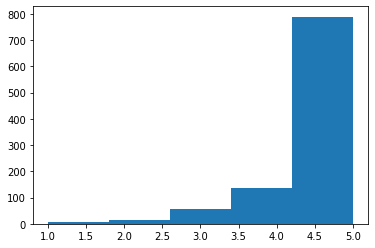

In [66]:
tmphist = plt.hist(s1.episode_lengths, bins=5)

Text(0.5, 1.0, 'cumulative win proportion over 1000 iterations of learning')

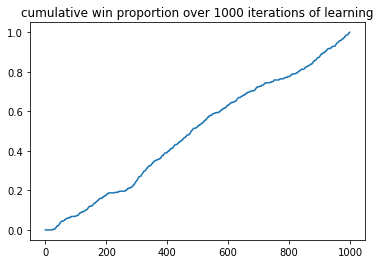

In [69]:
summed = []
i=0
for x in w1:
    i+=x
    summed.append(i/sum(w1))
plt.plot(summed) ## how often do wins happen?
plt.title('cumulative win proportion over 1000 iterations of learning')
# plt.savefig('plots/CDF_grn_absent_yel_v1.svg')

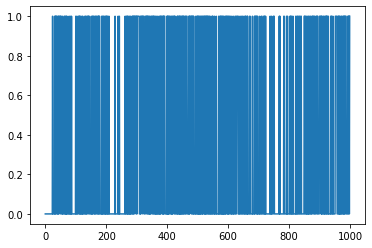

In [70]:
plt.plot(w1)

In [73]:
sum(w1)

352.0

In [72]:
### number of correct /1000 using yellows: [374, 416, 438]

In [ ]:
### number of correct /1000 without yellows: [319,333,296]

(array([240., 147., 132.,  86.,  55.,  92., 126.,  84.,  28.,  10.]),
 array([-15.,   0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135.]),
 <BarContainer object of 10 artists>)

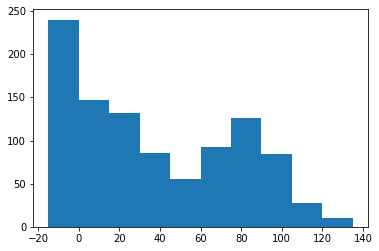

In [74]:
plt.hist(s1.episode_rewards)

In [76]:
q1

defaultdict(<function __main__.qLearning.<locals>.<lambda>()>,
            {0: array([-1.16812711,  4.82323256, -1.06201988]),
             1: array([-0.47203982,  1.65054425, 11.81468837]),
             2: array([-1.85667373, -1.62886305, 24.76369267]),
             3: array([ 0.34611128, -3.95531817, 19.12816836]),
             4: array([ 3.42233404, -4.42661826, 40.65029842]),
             5: array([0., 0., 0.])})

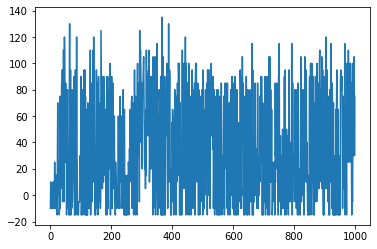

In [77]:
plt.plot(np.arange(len(s1.episode_lengths)), s1.episode_rewards)

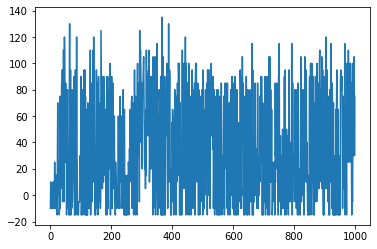

In [78]:
plt.plot(np.arange(len(s1.episode_lengths)), s1.episode_rewards)

In [79]:
# w1.keys()

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [81]:
w1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [80]:
w1['COUGH']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices